** Outline:**
* Визуализация данных
* Генерация данных    

In [1]:
from IPython.core.display import Image
import pandas
from sklearn import datasets
from scipy.stats import gaussian_kde
import seaborn as sns
from matplotlib.colors import ListedColormap
from numpy import *
from matplotlib.pyplot import *


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<h1 align="center">  Визуализация данных </h1>

# Квартет Энскомба

Подробнее, см. на Википедии.

Наборы данных имеют одинаковое среднее, дисперсию, коэффициент корреляции между признаками. При визуализации на плоскости оказывается, что они имеют принципиально разный характер.


In [2]:
A = array([
[10.0, 8.04, 10.0, 9.14, 10.0, 7.46, 8.0, 6.58],
[8.0, 6.95, 8.0, 8.14, 8.0, 6.77, 8.0, 5.76],
[13.0, 7.58, 13.0, 8.74, 13.0, 12.74, 8.0, 7.71],
[9.0, 8.81, 9.0, 8.77, 9.0, 7.11, 8.0, 8.84],
[11.0, 8.33, 11.0, 9.26, 11.0, 7.81, 8.0, 8.47],
[14.0, 9.96, 14.0, 8.10, 14.0, 8.84, 8.0, 7.04],
[6.0, 7.24, 6.0, 6.13, 6.0, 6.08, 8.0, 5.25],
[4.0, 4.26, 4.0, 3.10, 4.0, 5.39, 19.0, 12.50],
[12.0, 10.84, 12.0, 9.13, 12.0, 8.15, 8.0, 5.56],
[7.0, 4.82, 7.0, 7.26, 7.0, 6.42, 8.0, 7.91],
[5.0, 5.68, 5.0, 4.74, 5.0, 5.73, 8.0, 6.89],
])
data = [A[:, :2], A[:, 2:4], A[:, 4:6], A[:, 6:]]

In [3]:
for idx, X in enumerate(data):
    print ('X%d' % (idx+1))
    print ('  Mean:', mean(X, axis=0))
    print ('  Std:', std(X, axis=0))
    print ('  Pearson correlation:', corrcoef(X.T)[0, 1])

X1
  Mean: [9.         7.50090909]
  Std: [3.16227766 1.93702422]
  Pearson correlation: 0.81642051634484
X2
  Mean: [9.         7.50090909]
  Std: [3.16227766 1.93710869]
  Pearson correlation: 0.8162365060002428
X3
  Mean: [9.  7.5]
  Std: [3.16227766 1.93593294]
  Pearson correlation: 0.8162867394895982
X4
  Mean: [9.         7.50090909]
  Std: [3.16227766 1.93608065]
  Pearson correlation: 0.8165214368885028


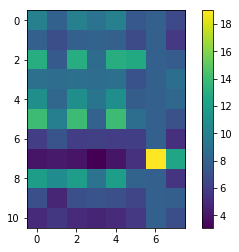

In [4]:
imshow(A, interpolation='none')
colorbar()

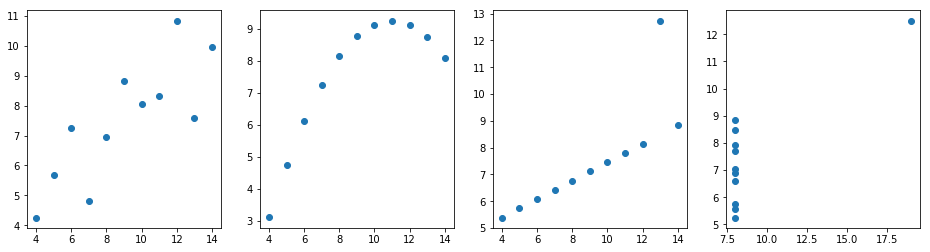

In [5]:
figure(figsize=(16, 4))
for idx, X in enumerate(data):
    subplot(1, 4, idx+1)
    scatter(X[:, 0], X[:, 1])

# Наборы данных

Стандартные наборы данных и генераторы в SciKit-Learn

In [6]:
diabetes = datasets.load_diabetes()
X = diabetes.data

In [7]:
# sample 1-d data
points1 = random.choice(X[:, 5], 100)

In [8]:
# sample 2-d data
points2x, points2y = X[:,5], X[:,6]

# Одномерные признаки

## Набор точек на прямой

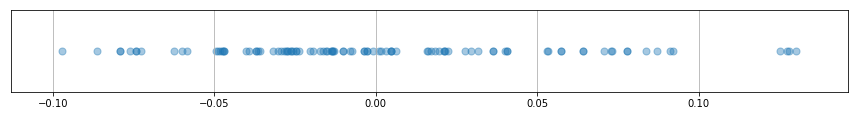

In [9]:
figure(figsize=(15, 1.5)), grid(True, axis='x'), yticks([])
scatter(points1, zeros(len(points1)), s=50, alpha=0.4)

## Jitter: случайно выбираем вертикальную координату, чтобы лучше видеть количество точек

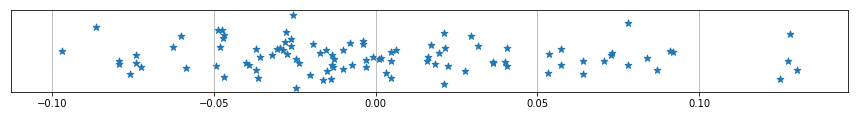

In [10]:
figure(figsize=(15, 1.5)), grid(True, axis='x'), yticks([])
scatter(points1, random.randn(len(points1)), s=50, marker='*')

## Гистограмма

(array([ 5.,  6., 16., 25., 14., 12.,  7.,  8.,  3.,  4.]),
 array([-0.09713731, -0.07440273, -0.05166815, -0.02893357, -0.00619899,
         0.01653558,  0.03927016,  0.06200474,  0.08473932,  0.1074739 ,
         0.13020848]),
 <a list of 10 Patch objects>)

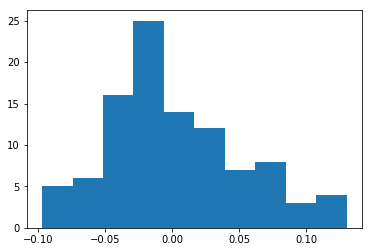

In [11]:
hist(points1)

## Гистограмма: число бинов

(<matplotlib.axes._subplots.AxesSubplot at 0x1a1c2812e8>,
 (array([ 1.,  1.,  0.,  3.,  3.,  0.,  3.,  0.,  7.,  0.,  6.,  3., 10.,
          2.,  9.,  4.,  5.,  6.,  1.,  2.,  6.,  2.,  2.,  2.,  3.,  0.,
          2.,  2.,  2.,  3.,  2.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,
          4.]),
  array([-0.09713731, -0.09145366, -0.08577002, -0.08008637, -0.07440273,
         -0.06871908, -0.06303544, -0.05735179, -0.05166815, -0.04598451,
         -0.04030086, -0.03461722, -0.02893357, -0.02324993, -0.01756628,
         -0.01188264, -0.00619899, -0.00051535,  0.0051683 ,  0.01085194,
          0.01653558,  0.02221923,  0.02790287,  0.03358652,  0.03927016,
          0.04495381,  0.05063745,  0.0563211 ,  0.06200474,  0.06768839,
          0.07337203,  0.07905568,  0.08473932,  0.09042296,  0.09610661,
          0.10179025,  0.1074739 ,  0.11315754,  0.11884119,  0.12452483,
          0.13020848]),
  <a list of 40 Patch objects>))

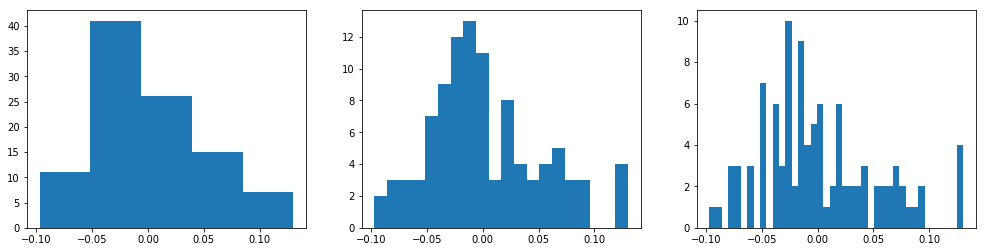

In [12]:
figure(figsize=(17, 4))
subplot(1, 3, 1), hist(points1, bins=5)
subplot(1, 3, 2), hist(points1, bins=20)
subplot(1, 3, 3), hist(points1, bins=40)

## Последовательности

In [13]:
seq1 = [0.035753708, 0.025425873, -0.02886173, -0.062208079, 0.009859905, -0.029191028, 0.015445348, -0.041167612, 0.000661905, 0.022037345, -0.022692465, -0.013708704, 0.000864697, -0.00381506, 0.00566126, 0.046831302, -0.006634978, 0.034566982, -0.020528213, -0.008776701, -0.025919141, 0.015279487, 0.018577796, -0.014132879, 0.036607044, 0.011353209, -0.040542021, -0.022105644, -0.014888368, 0.007026745, -0.011494996, -0.041136038, -0.002631499, 0.024654643, -0.03584061, 0.017303168, 0.001725406, 0.004975853, 0.000671759, -0.005891895, -0.013689039, 0.002192959, 0.007913215, -0.03852223, 0.007958798, -0.007133473, 0.011234009, -0.001410361]

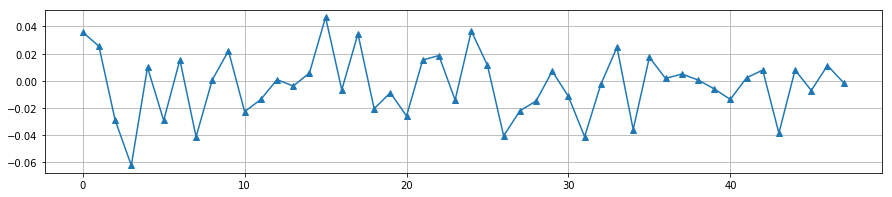

In [14]:
figure(figsize=(15, 3))
plot(seq1, '-^')
grid(True)

<StemContainer object of 3 artists>

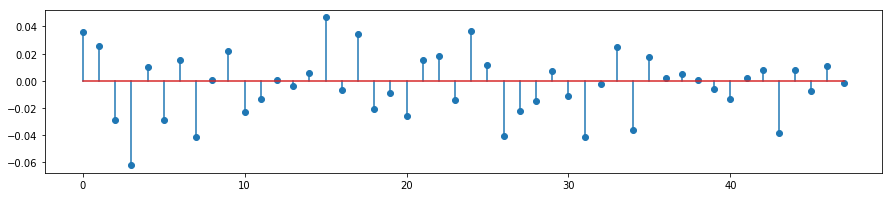

In [15]:
figure(figsize=(15, 3))

# Stem plot
stem(seq1)

<BarContainer object of 48 artists>

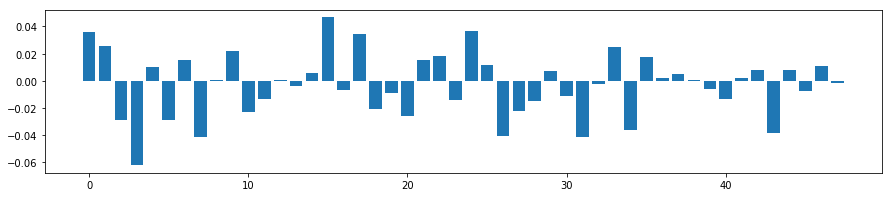

In [16]:
figure(figsize=(15, 3))
bar(arange(len(seq1)), seq1)

## Данные какой размерности можно представить одним двумерным скаттер-плотом?

 - координата X
 - координата Y
 - цвет
 - размер
 - форма

In [17]:
diabetes = datasets.load_diabetes()

In [18]:
min(diabetes.data[:, 5]), max(diabetes.data[:, 5])

(-0.115613065979398, 0.198787989657293)

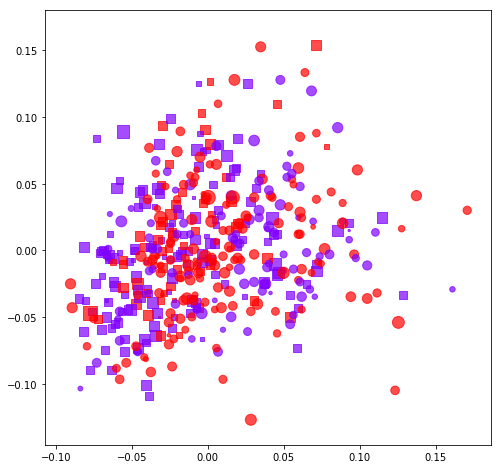

In [19]:
figure(figsize=(8, 8))

feature = diabetes.data[:, 5]
s = 200*((feature - min(feature)) / (max(feature) - min(feature)))

feature2 = (diabetes.data[:, 6] > 0)

scatter(diabetes.data[feature2, 2], 
        diabetes.data[feature2, 4], 
        c=diabetes.data[feature2, 1], 
        s=s, 
        cmap='rainbow', 
        marker='s',
        alpha=0.7)
scatter(diabetes.data[logical_not(feature2), 2], 
        diabetes.data[logical_not(feature2), 4], 
        c=diabetes.data[logical_not(feature2), 1], 
        s=s, 
        cmap='rainbow', 
        marker='o',
        alpha=0.7)

## Дискретные признаки и scatter

In [20]:
f = (diabetes.data[:,3] - min(diabetes.data[:,3]) )*4
feature = zeros(len(f))
feature[f > 0.2] = 1
feature[f > 0.4] = 2
feature[f > 0.6] = 3
feature[f > 0.8] = 4

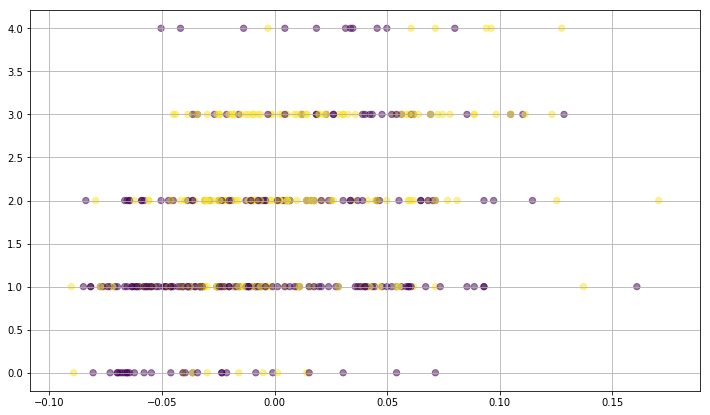

In [21]:
figure(figsize=(12, 7))
scatter(diabetes.data[:,2], feature, alpha=0.5, c=diabetes.data[:, 1], s=40)
grid(True)

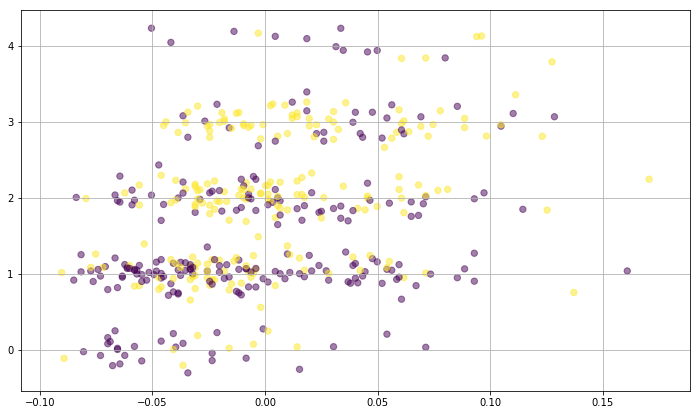

In [23]:
figure(figsize=(12, 7))
scatter(diabetes.data[:,2], feature + 0.15*random.randn(len(feature)), alpha=0.5, c=diabetes.data[:, 1], s=40)
grid(True)

<h1 align="center"> Генерация данных </h1>

# Случайные наборы данных

In [24]:
def plot_model_data(blue_data, red_data):
    figure(figsize=(10, 10))
    scatter(blue_data[:,0], blue_data[:,1], color="blue", alpha=0.3)
    scatter(red_data[:,0], red_data[:,1], color="red", alpha=0.3)
    show()

In [25]:
def generate_linear(point_count, slope, constant):
    points = np.random.rand(point_count, 2)
    above_index = slope * points[:, 0] + constant < points[:, 1]
    blue_data = points[above_index, :]
    red_data = points[~above_index, :]
    return blue_data, red_data

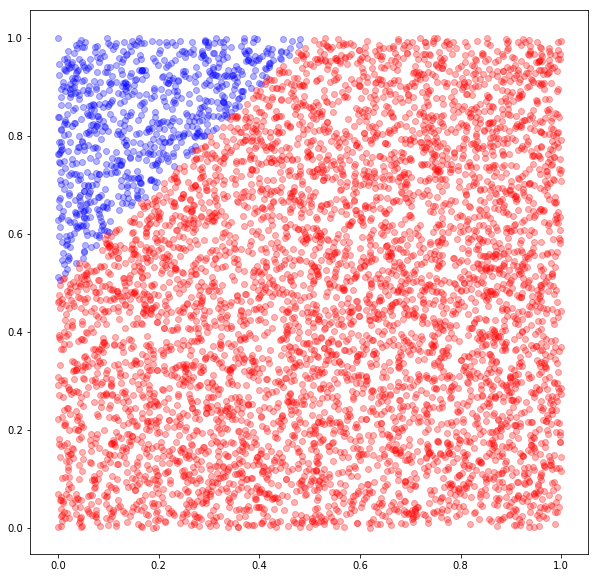

In [26]:
linear1, linerate2 = generate_linear(6000, 1, 0.5)
plot_model_data(linear1, linerate2)

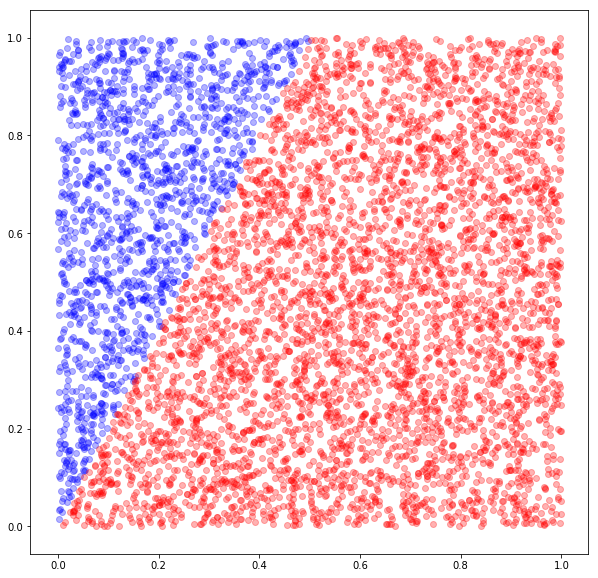

In [27]:
linear1, linerate2 = generate_linear(6000, 2, 0.0)
plot_model_data(linear1, linerate2)

In [83]:
def generate_gaussian(point_count, mu, transform_matrix):
    """V = transform_matrix
    function: X = mu + V.T x X
    output: Normal(mu, V.T x V)
    """
    points = np.random.randn(point_count, 2)
    points = mu + np.dot(transform_matrix.T, points.T).T
    return points

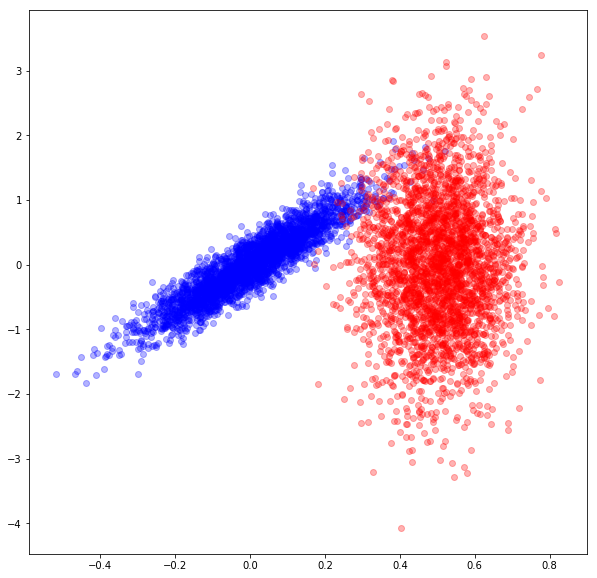

In [84]:
blue_data = generate_gaussian(3000, (0, 0), np.array([[0.1, 0.2], [0.1, 0.5]]))
red_data = generate_gaussian(3000, (0.5, 0), np.array([[0.1, 0], [0, 1.0]]))
plot_model_data(blue_data, red_data)

# Генерация выборок в sklearn

**Способы генерации данных:** 
* make_classification
* make_regression
* make_circles
* make_checkerboard
* etc

#### datasets.make_circles

In [85]:
circles = datasets.make_circles()

In [86]:
print ("features: {}".format(circles[0][:10]))
print ("target: {}".format(circles[1][:10]))

features: [[ 0.42577929  0.90482705]
 [ 0.70104534 -0.38540294]
 [-0.96858316  0.24868989]
 [-0.63742399  0.77051324]
 [-0.74382119  0.29449964]
 [-0.87630668  0.48175367]
 [ 0.53582679  0.84432793]
 [ 0.63742399 -0.77051324]
 [ 0.2472136   0.76084521]
 [ 0.42866144 -0.67546234]]
target: [0 1 0 0 1 0 0 0 1 1]


In [87]:
# классы точек в датасете
circles[1]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1])

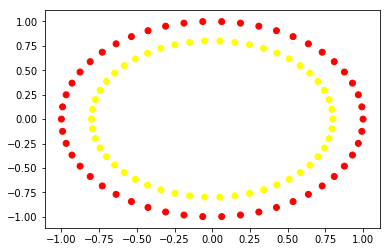

In [92]:
colors = ListedColormap(['red', 'yellow'])

scatter(list((x[0] for x in circles[0])), list((x[1] for x in circles[0])), c = circles[1], cmap = colors)